In [1]:
import pandas as pd
import parse_rankings

In [2]:
m_100_df = parse_rankings.parse_with_wind('m_100.txt')
w_100_df = parse_rankings.parse_with_wind('w_100.txt')
m_200_df = parse_rankings.parse_with_wind('m_200.txt')
w_200_df = parse_rankings.parse_with_wind('w_200.txt')
m_110H_df = parse_rankings.parse_with_wind('m_110H.txt')
w_100H_df = parse_rankings.parse_with_wind('w_100H.txt')


In [3]:
m_400_df = parse_rankings.parse_no_wind('m_400.txt')
w_400_df = parse_rankings.parse_no_wind('w_400.txt')
m_400H_df = parse_rankings.parse_no_wind('m_400H.txt')
w_400H_df = parse_rankings.parse_no_wind('w_400H.txt')
m_800_df = parse_rankings.parse_no_wind('m_800.txt')
w_800_df = parse_rankings.parse_no_wind('w_800.txt')
m_1500_df = parse_rankings.parse_no_wind('m_1500.txt')
w_1500_df = parse_rankings.parse_no_wind('w_1500.txt')
m_3000SC_df = parse_rankings.parse_no_wind('m_3000SC.txt')
w_3000SC_df = parse_rankings.parse_no_wind('w_3000SC.txt')
m_5000_df = parse_rankings.parse_no_wind('m_5000.txt')
w_5000_df = parse_rankings.parse_no_wind('w_5000.txt')
m_10000_df = parse_rankings.parse_no_wind('m_10000.txt')
w_10000_df = parse_rankings.parse_no_wind('w_10000.txt')


In [4]:
event_dict = {
    'm_100': m_100_df,
    'w_100': w_100_df,
    'm_110H': m_110H_df,
    'w_100H': w_100H_df,
    'm_200': m_200_df,
    'w_200': w_200_df,
    'm_400': m_400_df,
    'w_400': w_400_df,
    'm_400H': m_400H_df,
    'w_400H': w_400H_df,
    'm_800': m_800_df,
    'w_800': w_800_df,
    'm_1500': m_1500_df,
    'w_1500': w_1500_df,
    'm_3000SC': m_3000SC_df,
    'w_3000SC': w_3000SC_df,
    'm_5000': m_5000_df,
    'w_5000': w_5000_df,
    'm_10000': m_10000_df,
    'w_10000': w_10000_df,
}

In [5]:
# Function to rerank times
def rerank_times(df):
    df['rerank'] = df['time_in_secs'].rank(method='min', ascending=True)
    return df

In [6]:
columns = ['event', 'year', 'n_top_performances', 'n_top_athletes']
results_df = pd.DataFrame(columns=columns)

for event_name, event_df in event_dict.items():
# Iterate through each year from 2024 to 2000
    for year in range(2024, 1999, -1):
        # Remove rows with "future" years
        filtered_df = event_df[event_df['race_year'] <= year].copy()
        
        # Rerank times
        filtered_df = rerank_times(filtered_df)

        # Filter to only top 25 in the rerank column
        filtered_df_2 = filtered_df[(filtered_df['rerank']<=25) & (filtered_df['race_year']==year)].copy()

        # Count number of performances and number of athletes in top 25
        n_athletes = len(filtered_df_2['athlete_name'].unique())
        n_performances = filtered_df_2.shape[0]

        # New rows as dictionaries
        new_row = [
            {'event': event_name, 'year': year, 'n_top_performances': n_performances, 'n_top_athletes': n_athletes}
        ]

        # Adding rows using pd.concat
        df_new_row = pd.DataFrame(new_row)
        results_df = pd.concat([results_df, df_new_row], ignore_index=True)

In [7]:
results_df.to_csv('results.csv')

In [8]:
# columns = ['event', 'year', 'n_top_performances', 'n_top_athletes']
# results_df_800 = pd.DataFrame(columns=columns, data=[])

# # Iterate through each year from 2024 to 2000
# for year in range(2024, 1999, -1):
#     # Remove rows with "future" years
#     filtered_df = event_dict['m_800'][event_dict['m_800']['race_year'] <= year].copy()
    
#     # Rerank times
#     filtered_df = rerank_times(filtered_df)

#     # Filter to only top 25 in the rerank column
#     filtered_df_2 = filtered_df[(filtered_df['rerank']<=25) & (filtered_df['race_year']==year)].copy()

#     # Count number of performances and number of athletes in top 25
#     n_athletes = len(filtered_df_2['athlete_name'].unique())
#     n_performances = filtered_df_2.shape[0]

#     # New rows as dictionaries
#     new_row = [
#         {'event': 'm_800', 'year': year, 'n_top_performances': n_performances, 'n_top_athletes': n_athletes}
#     ]

#     # Adding rows using pd.concat
#     df_new_row = pd.DataFrame(new_row)
#     results_df_800 = pd.concat([results_df_800, df_new_row], ignore_index=True)

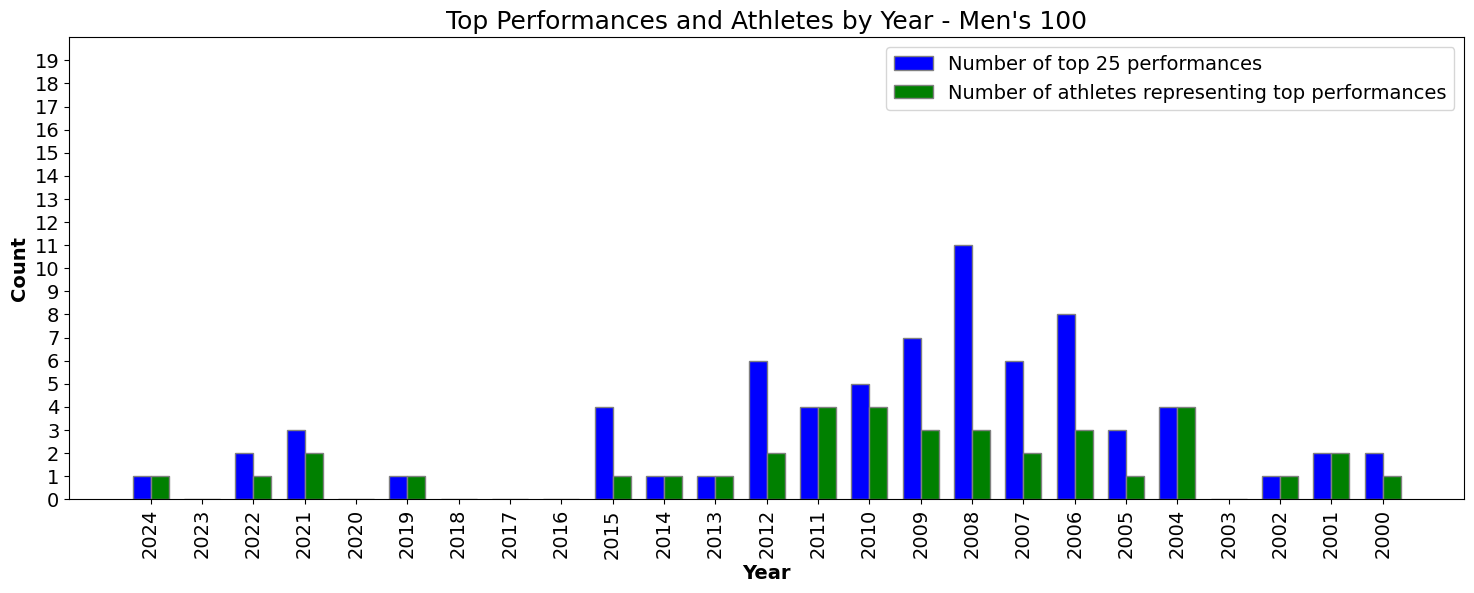

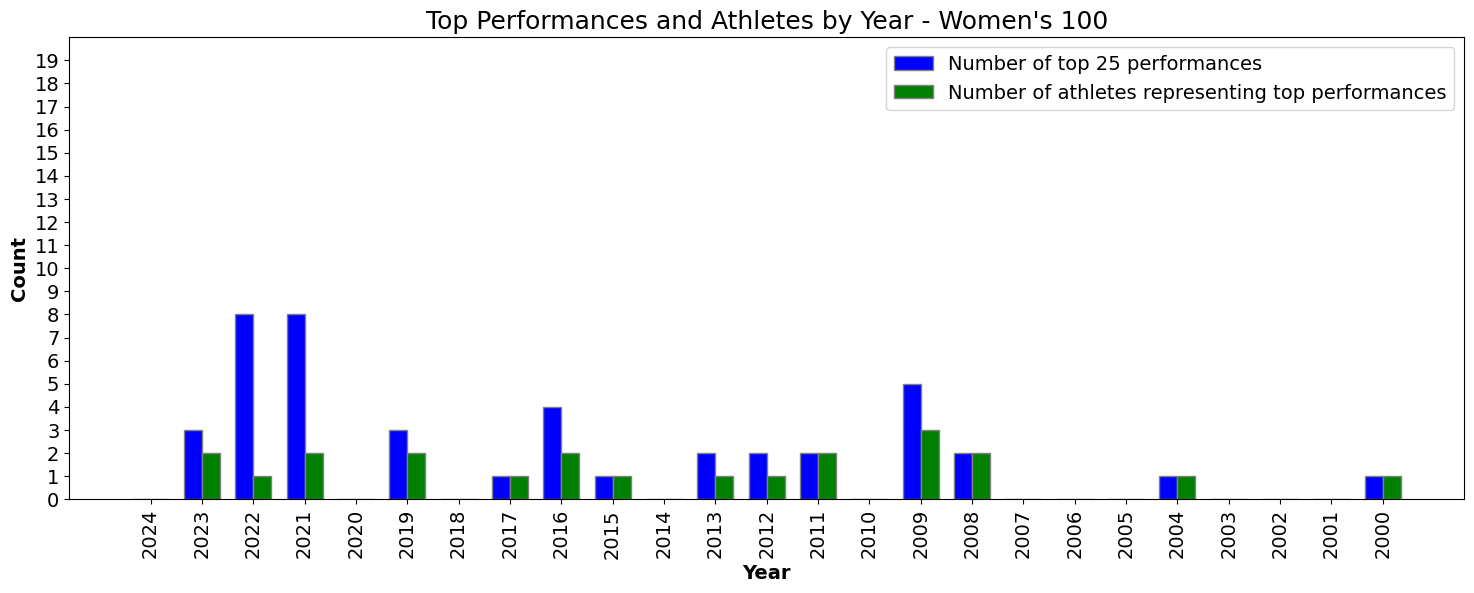

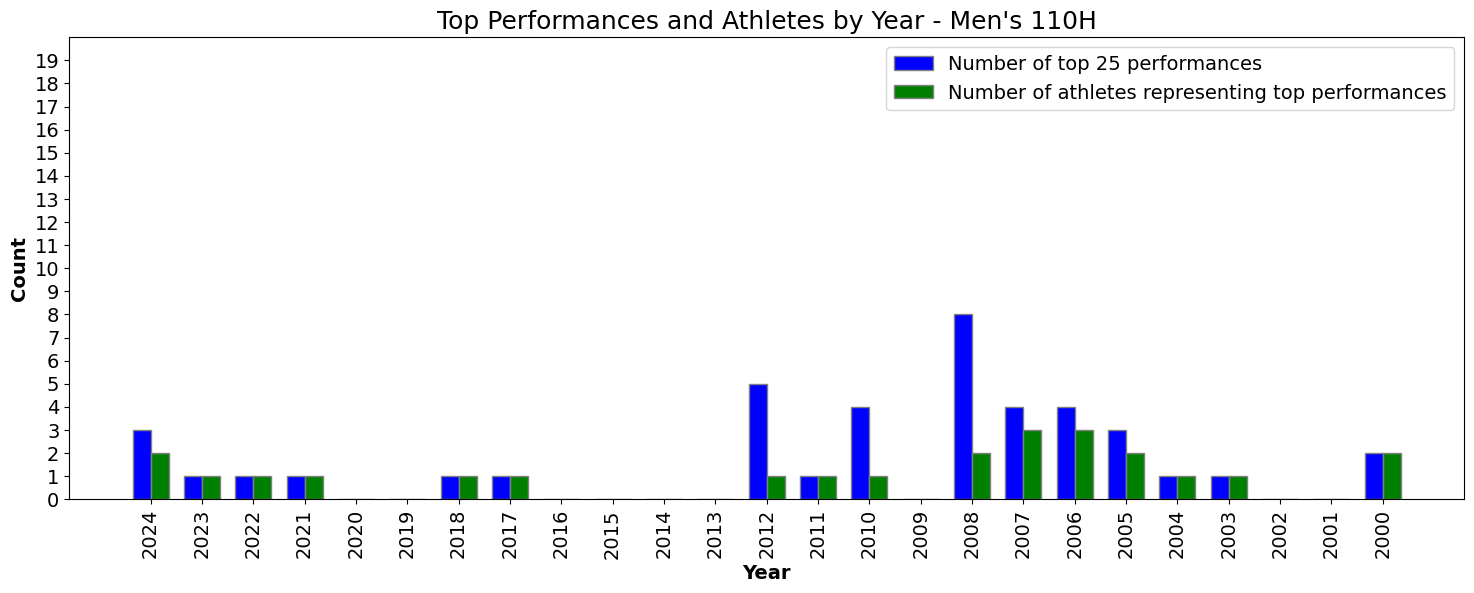

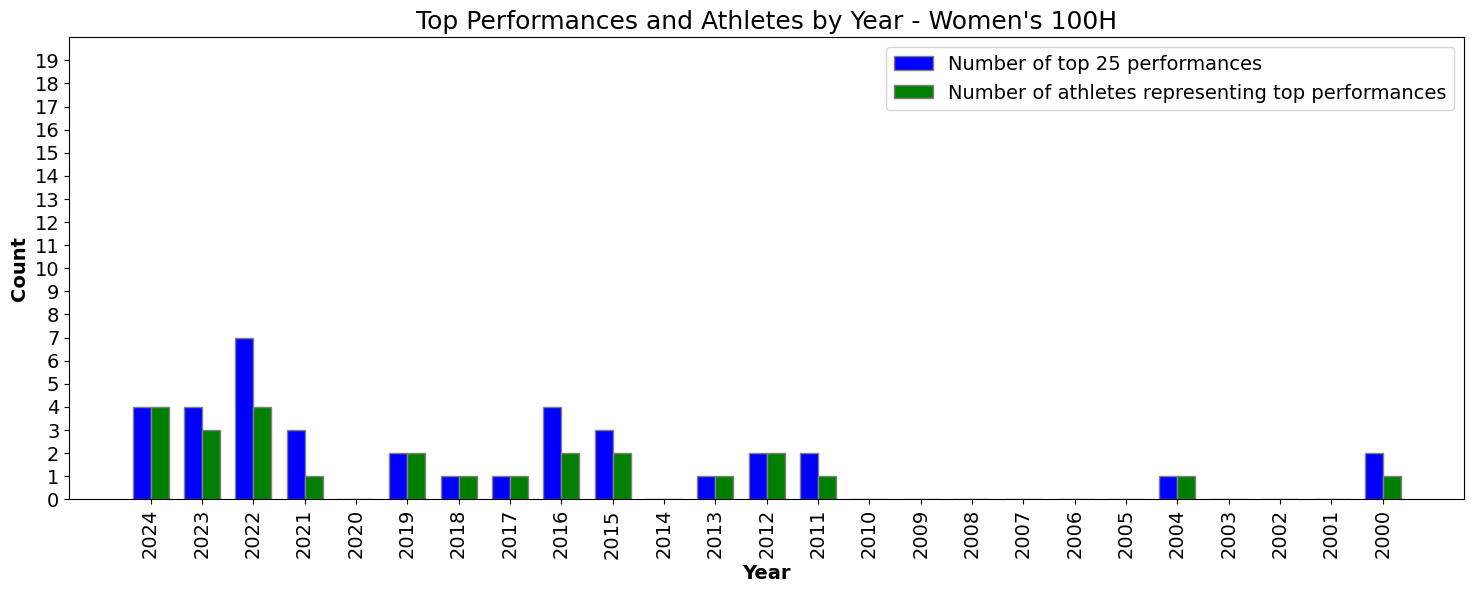

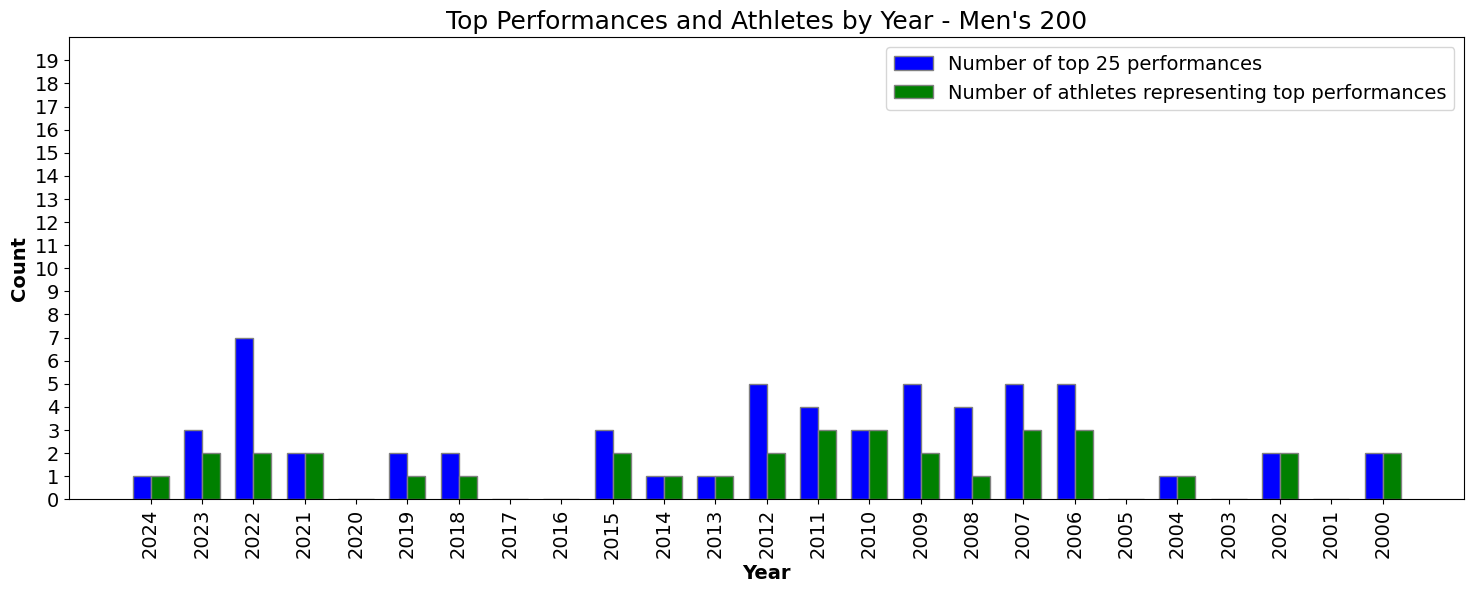

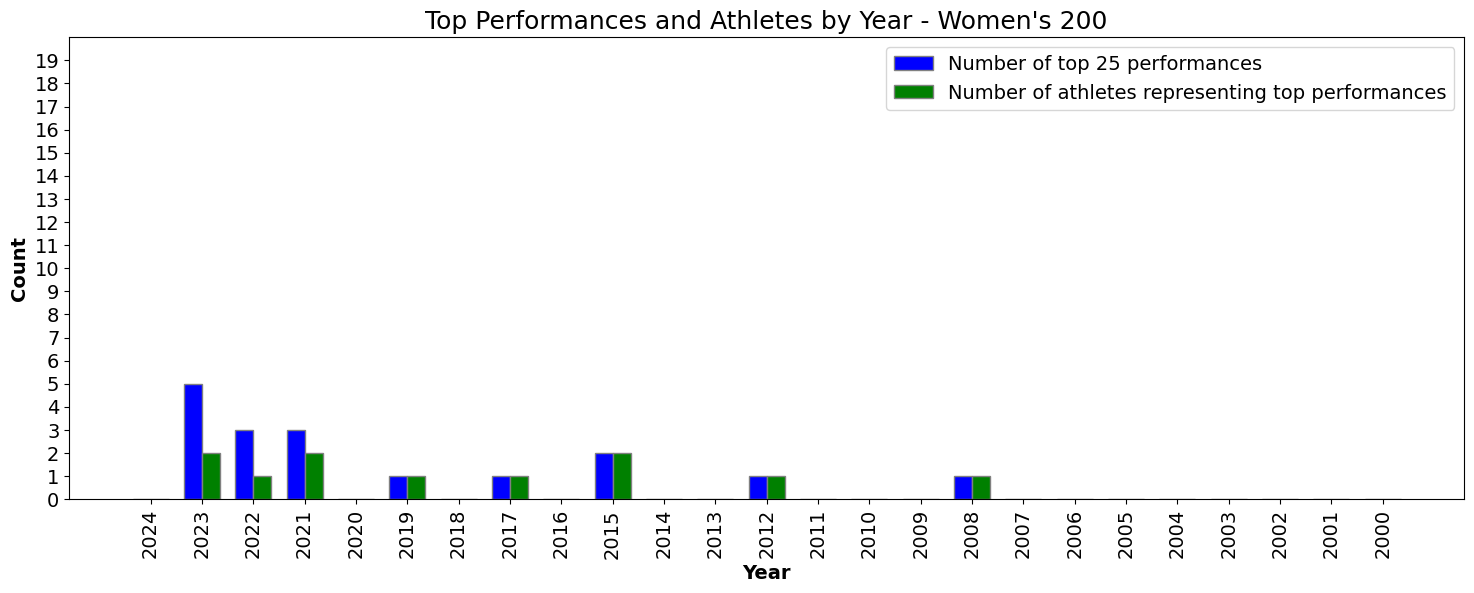

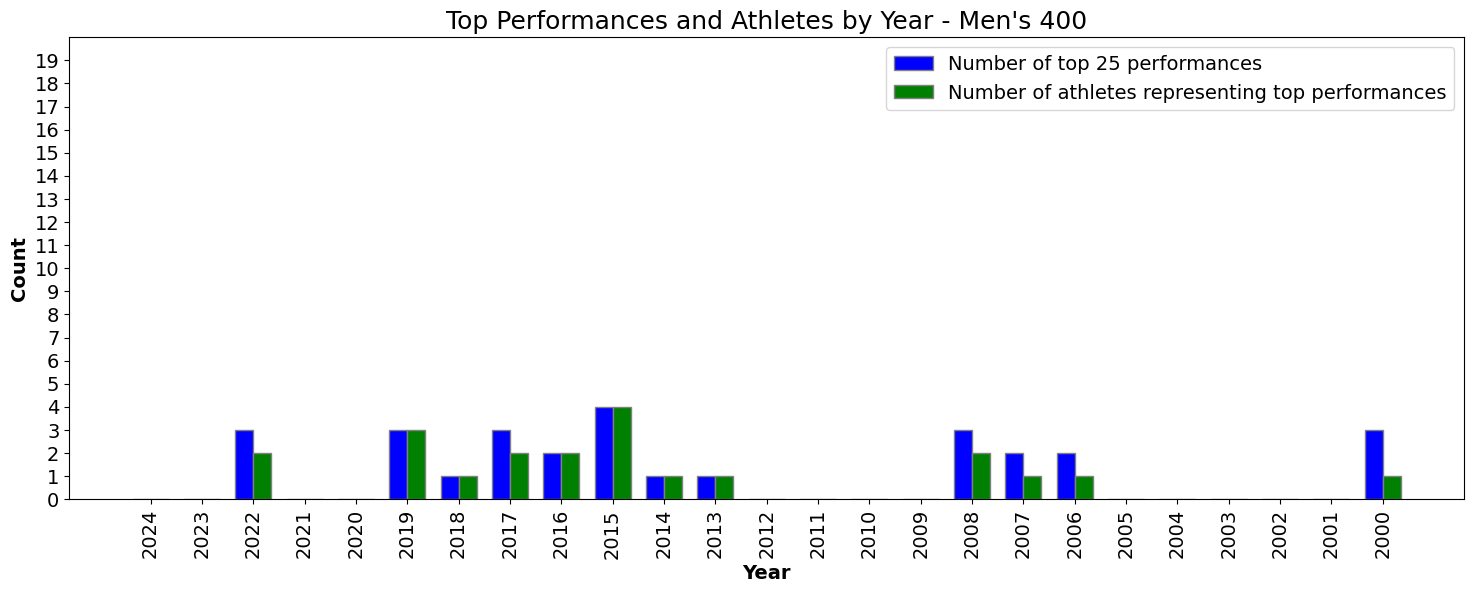

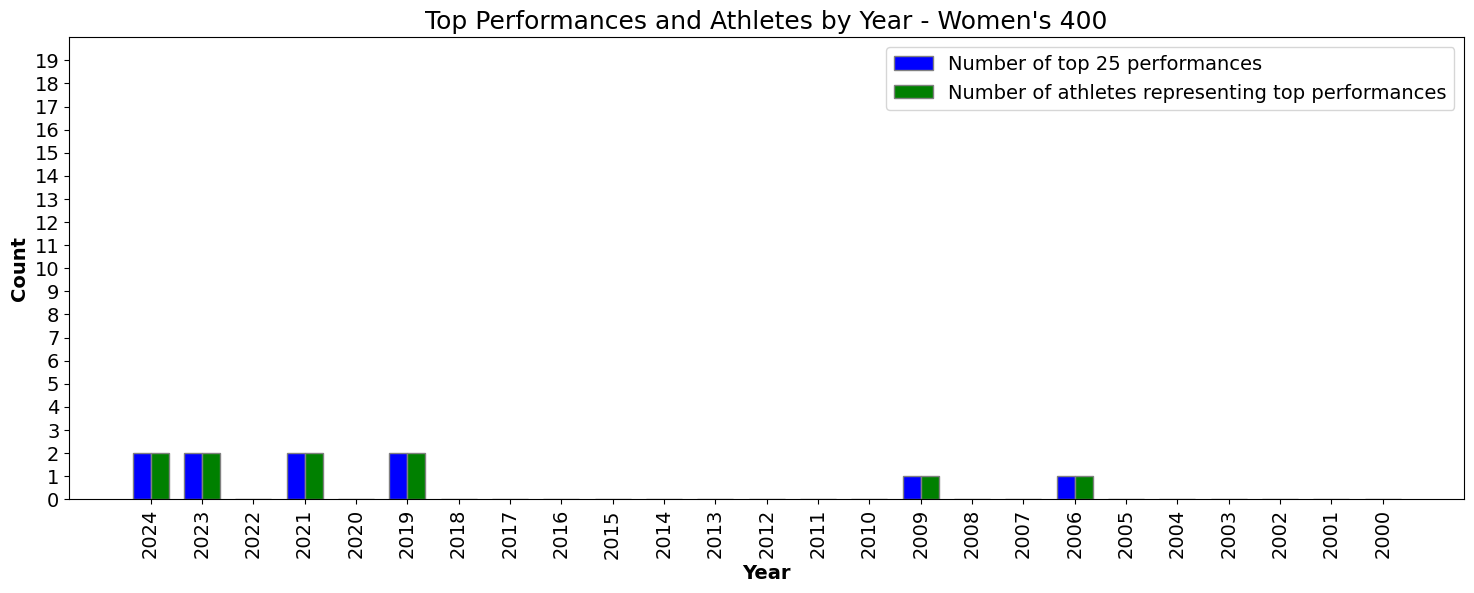

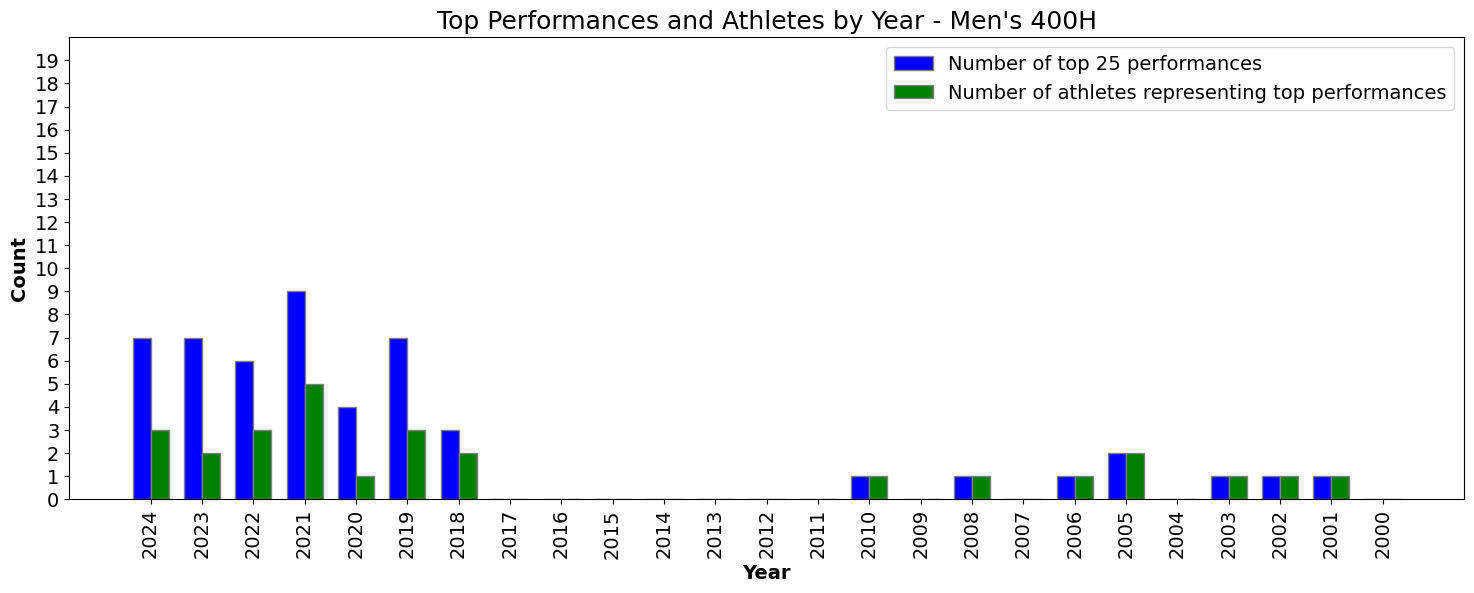

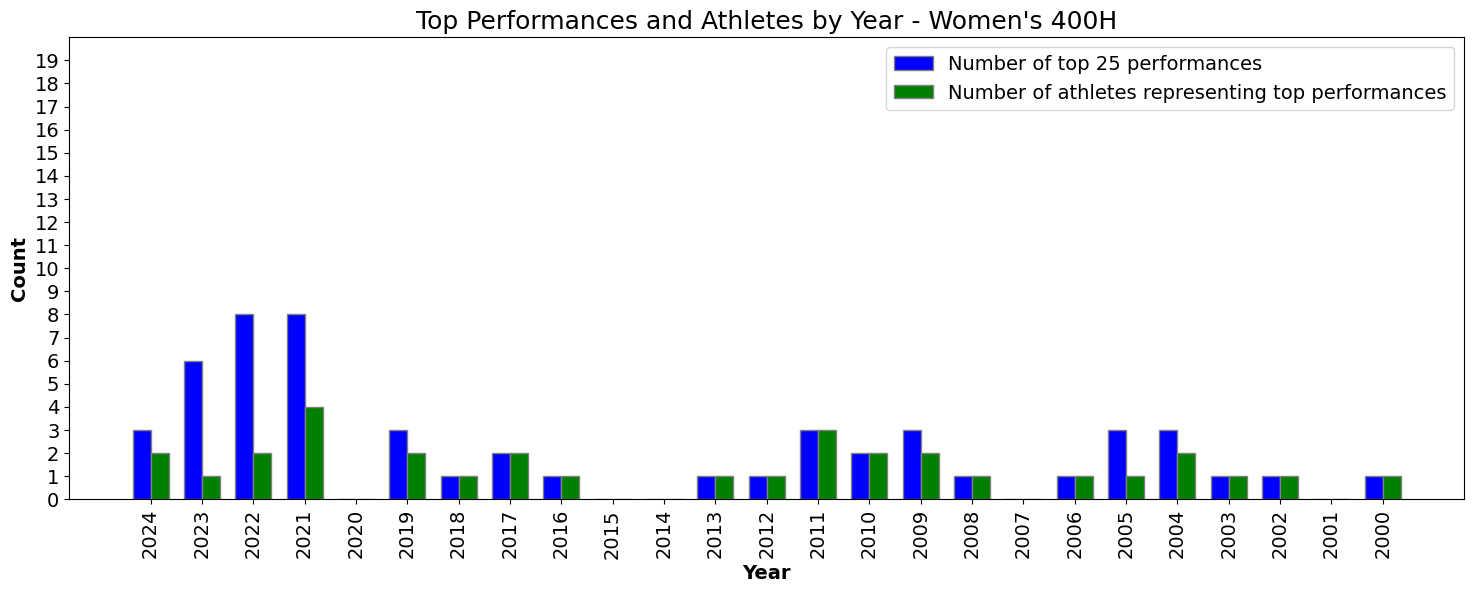

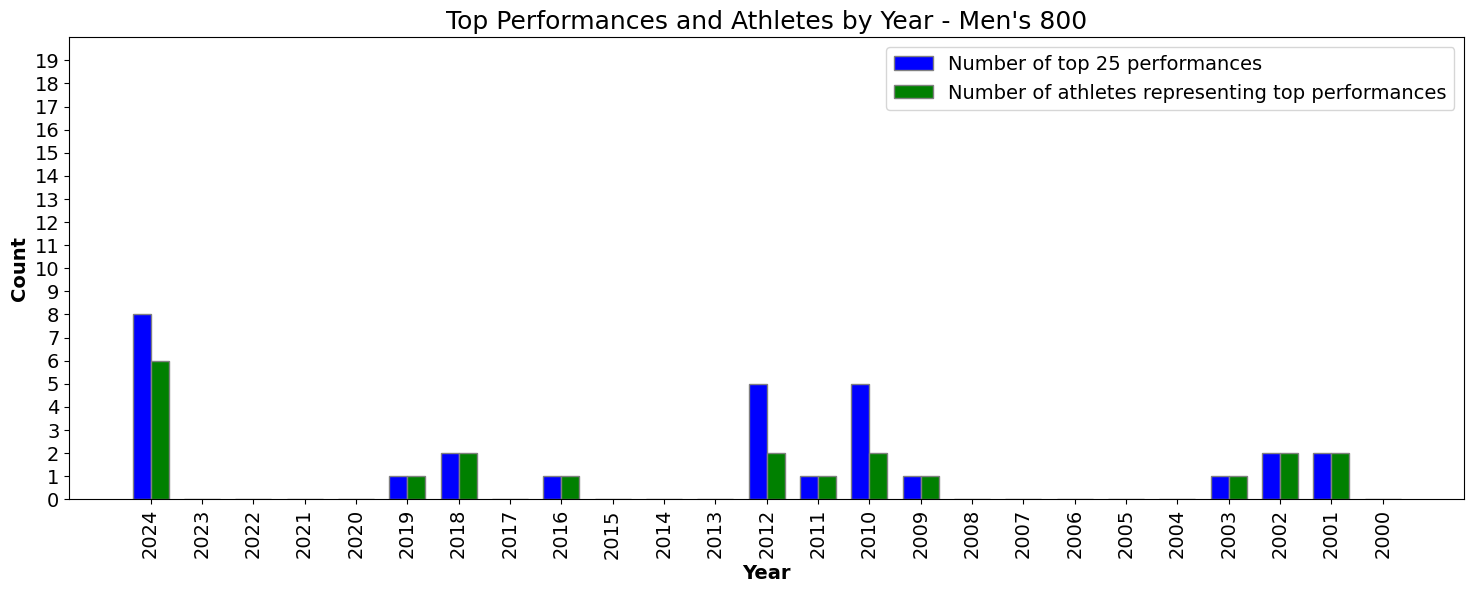

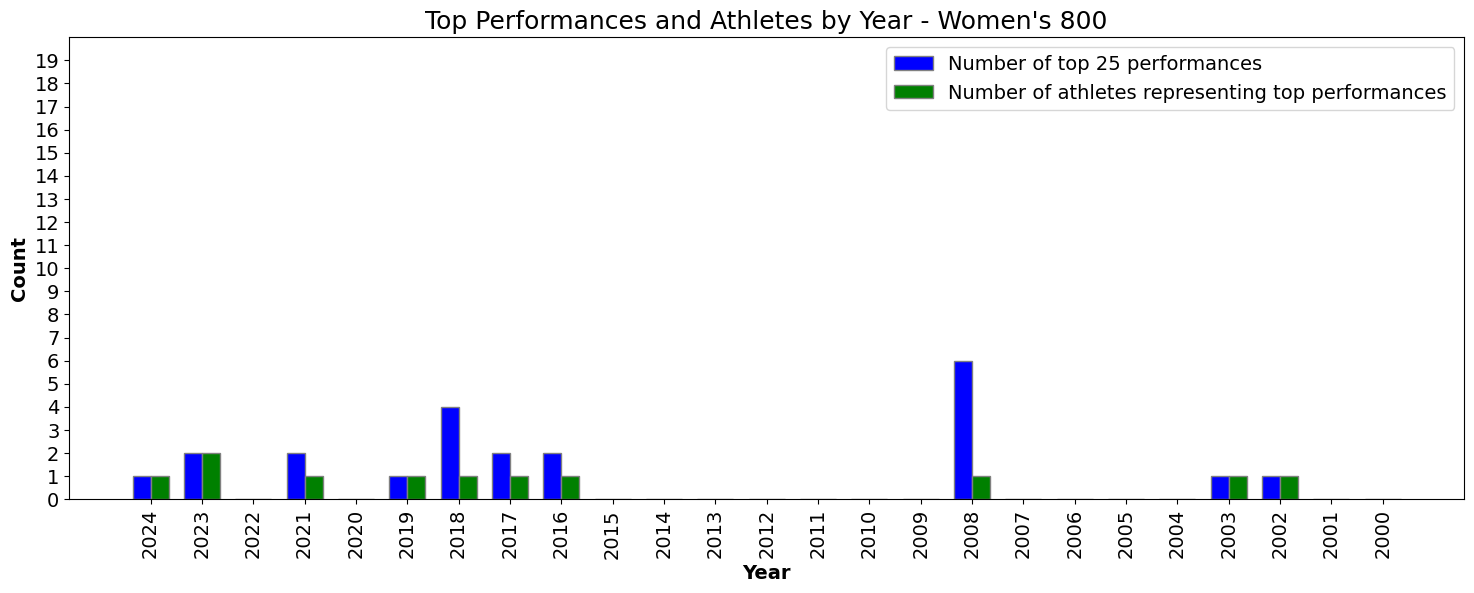

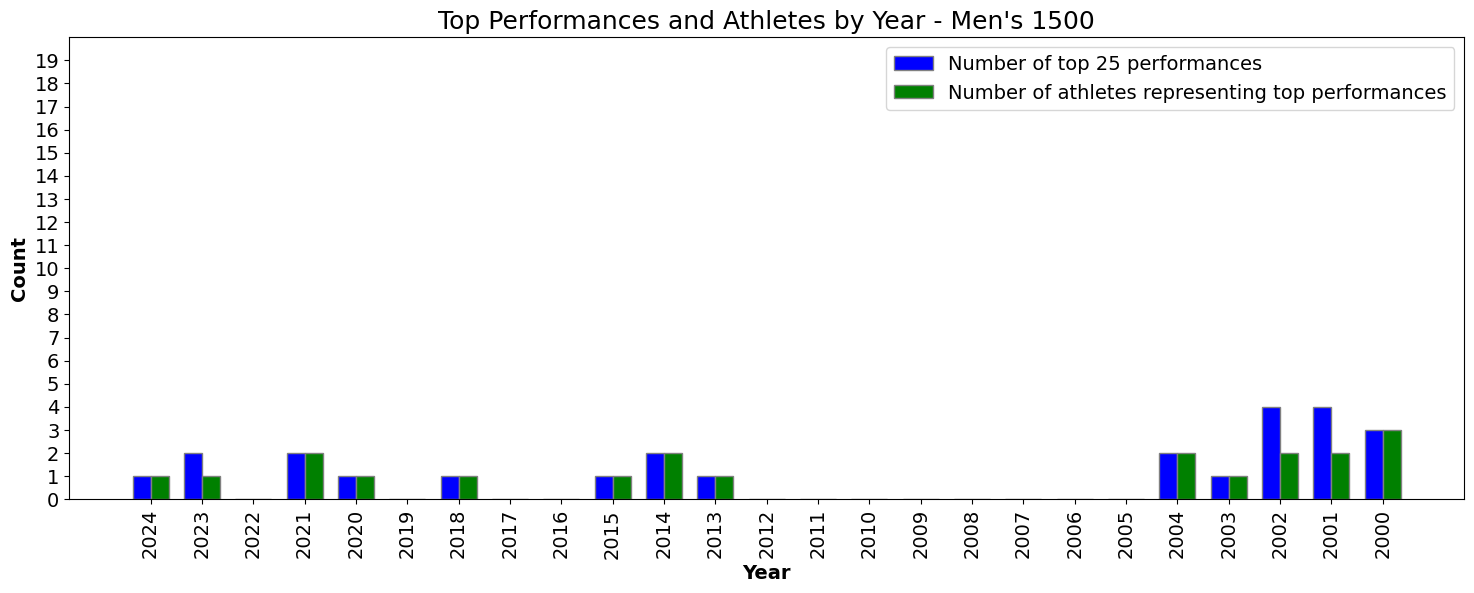

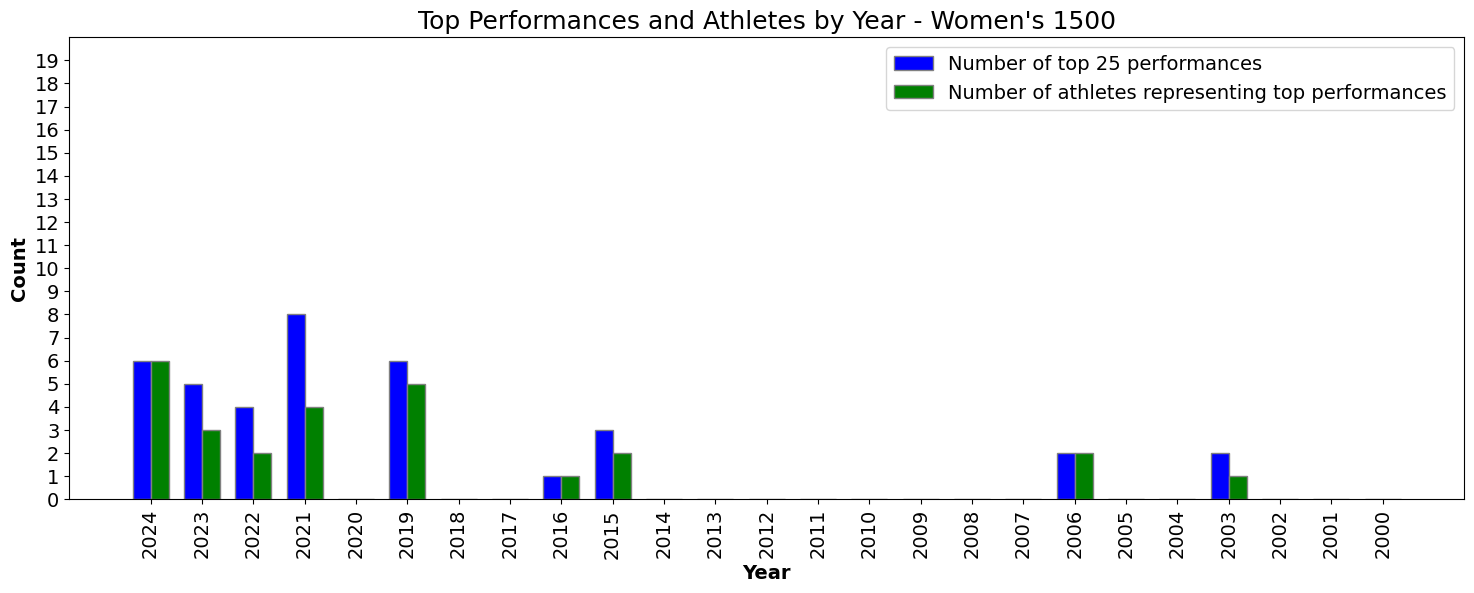

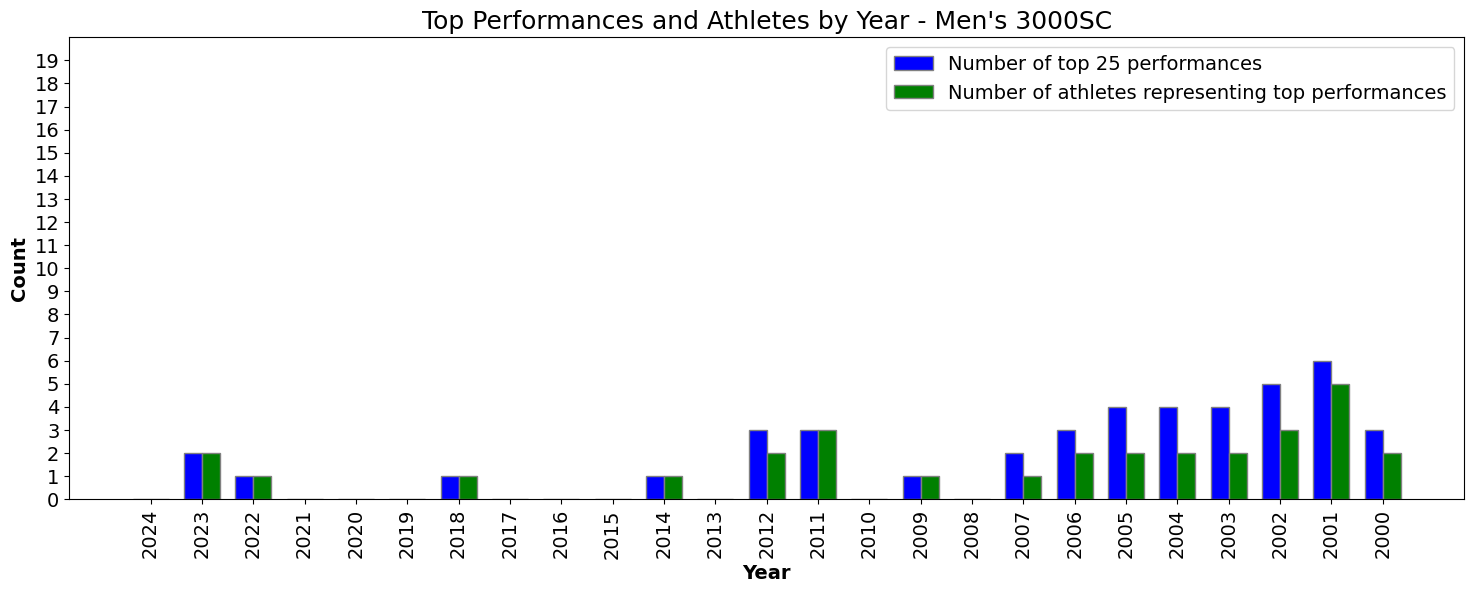

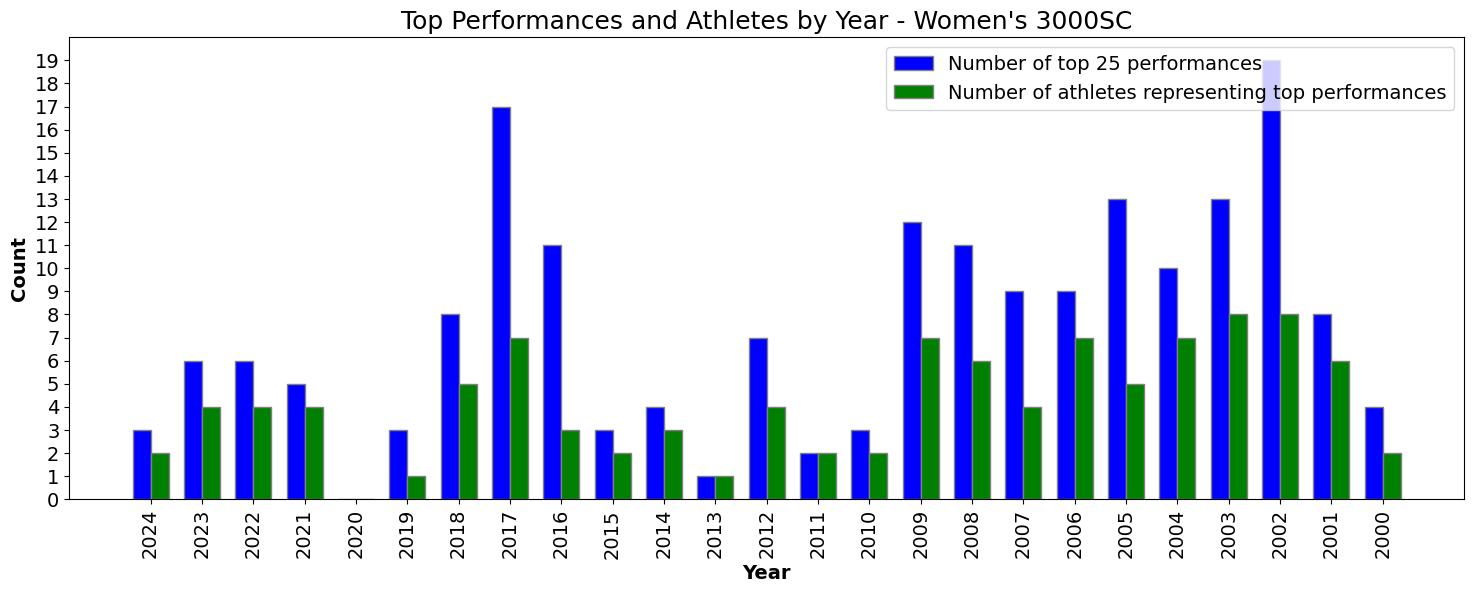

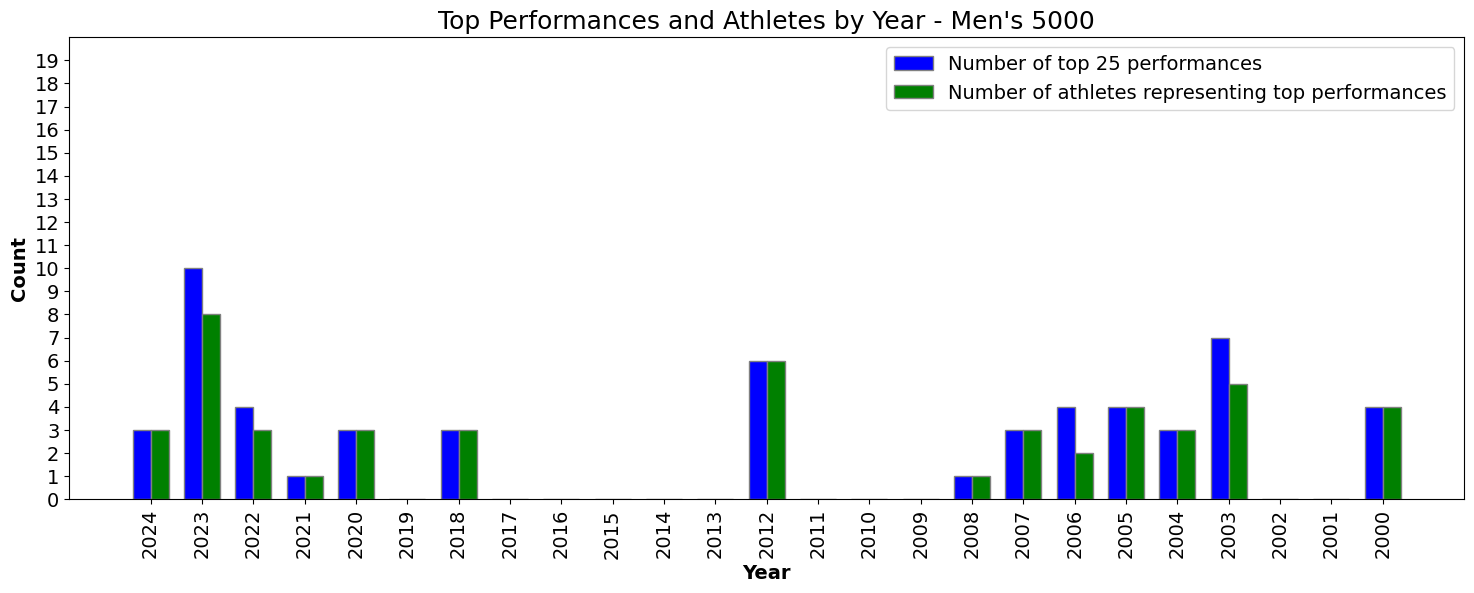

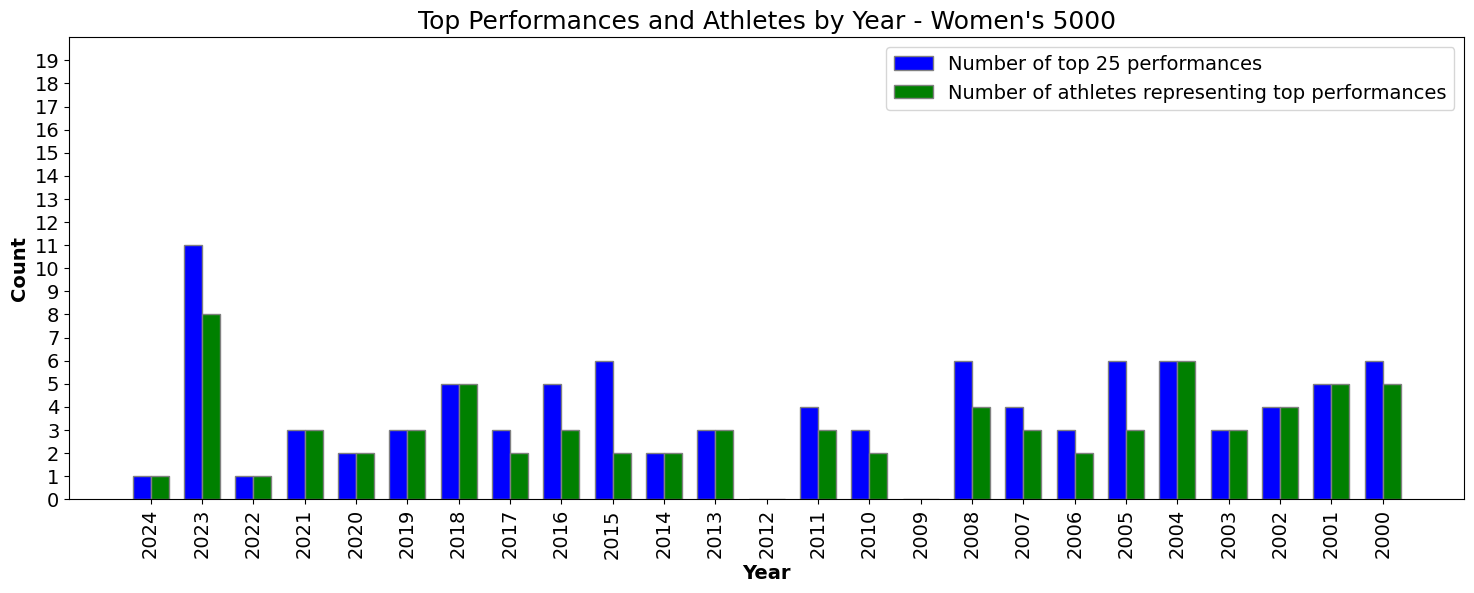

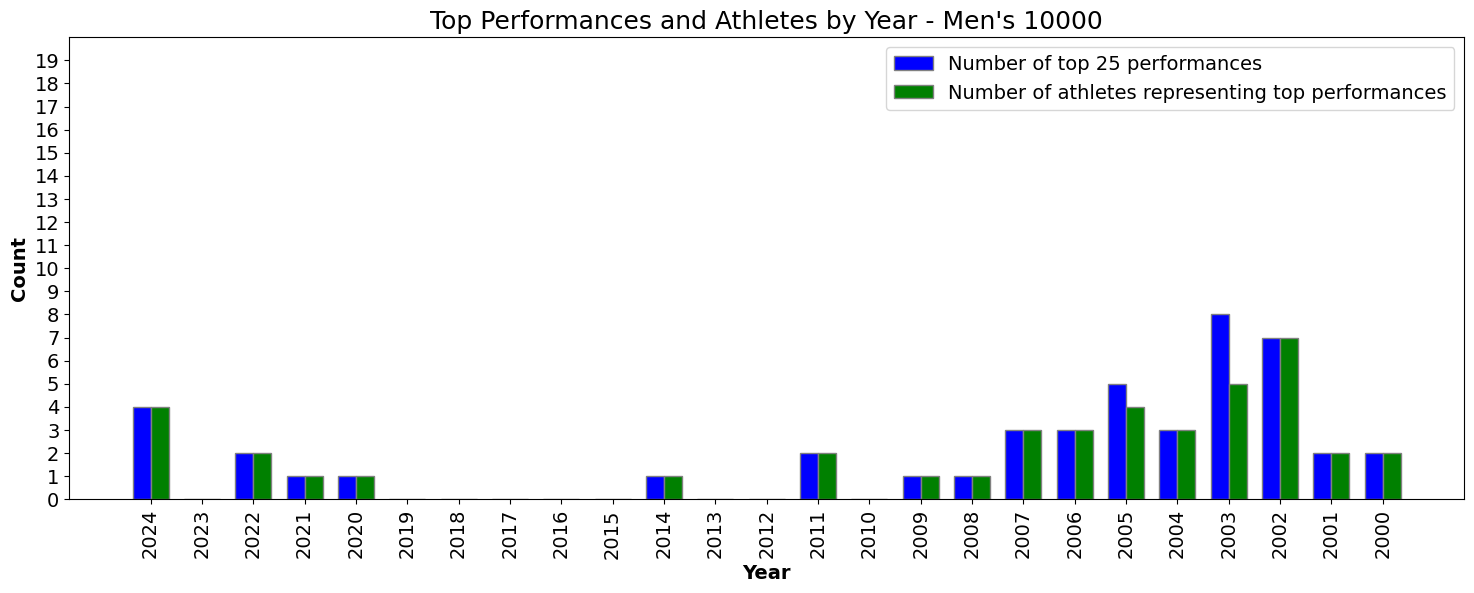

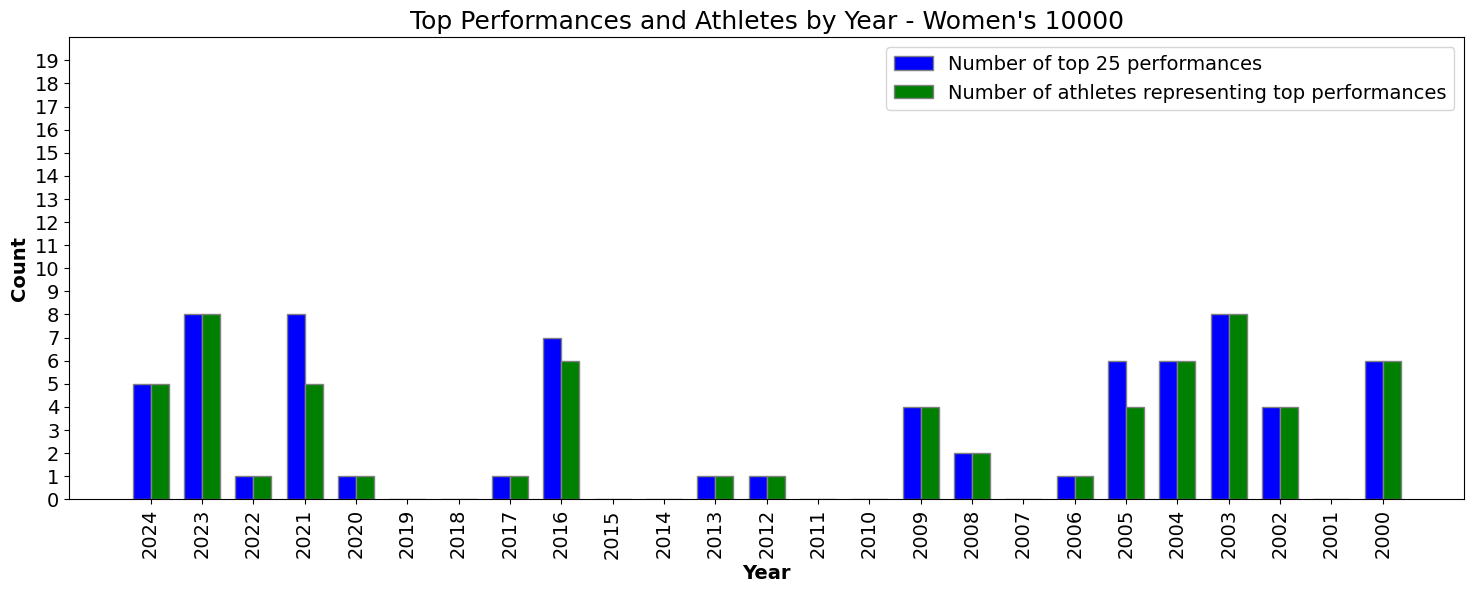

In [10]:
import matplotlib.pyplot as plt

for event in event_dict.keys():
    if 'm' in event:
        event_clean = event.replace('m_',"Men's ")
    else:
        event_clean = event.replace('w_',"Women's ")
    temp_df = results_df[results_df['event']==event].copy()
    # Plotting the bar chart
    fig, ax = plt.subplots(figsize=(18, 6))

    # Width of bars
    bar_width = 0.35

    # Set positions of bar on X axis
    r1 = range(len(temp_df['year']))
    r2 = [x + bar_width for x in r1]

    # Create bars
    bars1 = ax.bar(r1, temp_df['n_top_performances'], color='b', width=bar_width, edgecolor='grey', label='Number of top 25 performances')
    bars2 = ax.bar(r2, temp_df['n_top_athletes'], color='g', width=bar_width, edgecolor='grey', label='Number of athletes representing top performances')

    # Add labels
    ax.set_xlabel('Year', fontweight='bold', fontsize=14)
    ax.set_ylabel('Count', fontweight='bold', fontsize=14)
    ax.set_title(f'Top Performances and Athletes by Year - {event_clean}', fontsize=18)
    ax.set_xticks([r + bar_width / 2 for r in range(len(temp_df['year']))])
    ax.set_xticklabels(temp_df['year'], fontsize=14, rotation=90)
    ax.set_yticks(range(0, results_df.agg({'n_top_performances':'max'}).iloc[0] + 1))
    ax.set_yticklabels(labels=range(0, results_df.agg({'n_top_performances':'max'}).iloc[0] + 1), fontsize=14)

    # Create legend
    ax.legend(fontsize=14)

    # Set y-axis limits
    ax.set_ylim(0, results_df.agg({'n_top_performances':'max'}).iloc[0] + 1)

    # Show the plot
    plt.show()


In [71]:
results_2024_df = results_df[results_df['year']==2024].sort_values('n_top_performances', ascending=False).copy()

In [75]:
def clean_event_name(text):
    if 'm_' in text:
        return text.replace('m_', "Men's ")
    else:
        return text.replace('w_', "Women's ")

In [76]:
results_2024_df['event_clean'] = results_2024_df['event'].apply(clean_event_name)

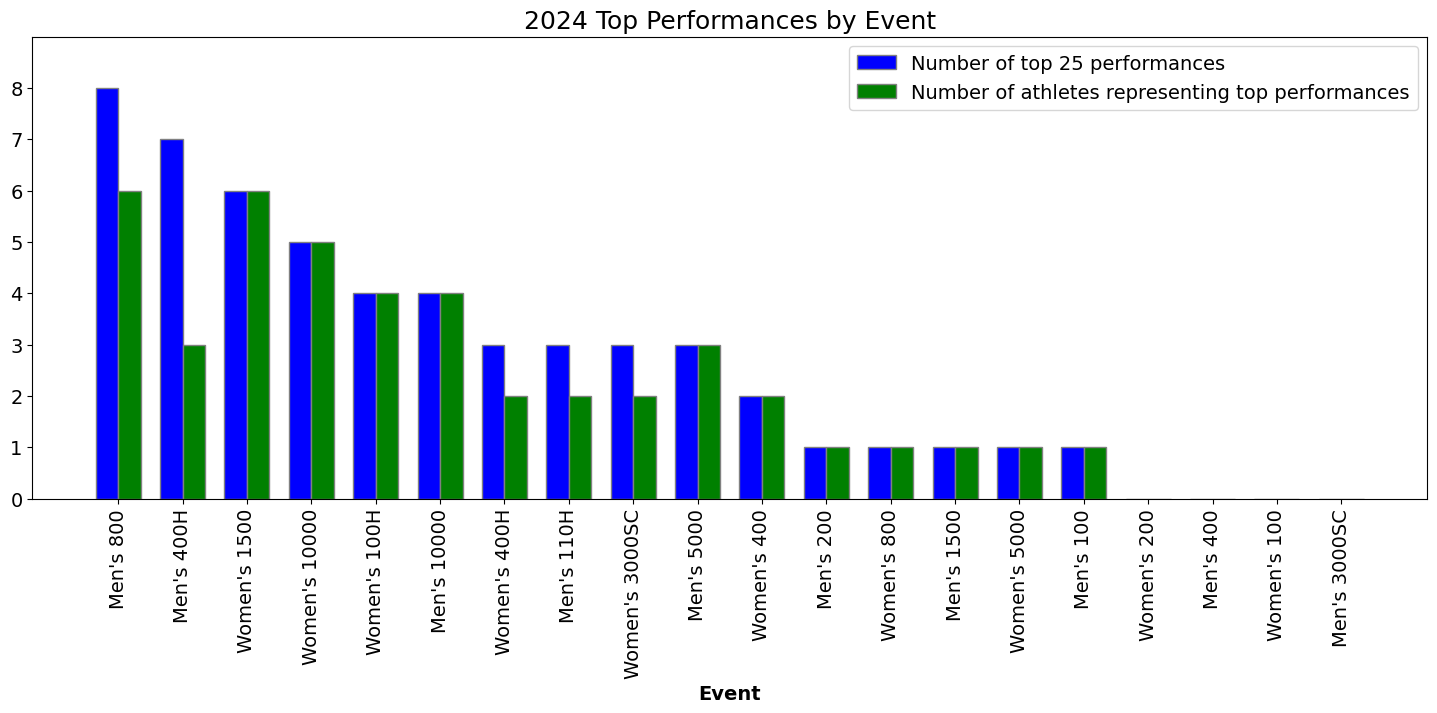

In [101]:
# Plotting the bar chart
fig, ax = plt.subplots(figsize=(18, 6))

# Width of bars
bar_width = 0.35

# Set positions of bar on X axis
r1 = range(len(results_2024_df['event_clean']))
r2 = [x + bar_width for x in r1]

# Create bars
bars1 = ax.bar(r1, results_2024_df['n_top_performances'], color='b', width=bar_width, edgecolor='grey', label='Number of top 25 performances')
bars2 = ax.bar(r2, results_2024_df['n_top_athletes'], color='g', width=bar_width, edgecolor='grey', label='Number of athletes representing top performances')

# Add labels
ax.set_xlabel('Event', fontweight='bold', fontsize=14)
ax.set_title('2024 Top Performances by Event', fontsize=18)
ax.set_xticks([r + bar_width / 2 for r in range(len(results_2024_df['event_clean']))])
ax.set_xticklabels(results_2024_df['event_clean'], rotation=90, fontsize=14)
ax.set_yticks(range(0, results_2024_df.agg({'n_top_performances':'max'}).iloc[0] + 1))
ax.set_yticklabels(labels=range(0, results_2024_df.agg({'n_top_performances':'max'}).iloc[0] + 1), fontsize=14)

# Create legend
ax.legend(fontsize=14)

# Set y-axis limits
ax.set_ylim(0, results_2024_df.agg({'n_top_performances':'max'}).iloc[0] + 1)

# Save the plot as a PNG file
plt.savefig('top_performances_2024.png', format='png', dpi=300)

# Show the plot
plt.show()

In [22]:
temp = rerank_times(m_1500_df[m_1500_df['race_year']<=2024].copy())
temp[temp['race_year']==2024].head(10)

,rank,time,athlete_name,race_date,race_year,event,time_in_secs,rerank
5,6,3:26.73,Jakob Ingebrigtsen,2024-07-12,2024,m_1500,206.73,6.0
35,36,3:28.71,Timothy Cheruiyot,2024-07-12,2024,m_1500,208.71,36.0
44,44,3:28.80,Brian Komen,2024-07-12,2024,m_1500,208.80,44.0
72,72,3:29.13,Yared Nuguse,2024-07-12,2024,m_1500,209.13,72.0
127,128,3:29.74,Jakob Ingebrigtsen,2024-05-30,2024,m_1500,209.74,128.0
132,130,3:29.77,Timothy Cheruiyot,2024-05-30,2024,m_1500,209.77,130.0
240,239,3:30.59,Cole Hocker,2024-06-24,2024,m_1500,210.59,239.0
255,256,3:30.65,Neil Gourley,2024-07-12,2024,m_1500,210.65,256.0
286,285,3:30.80,Azeddine Habz,2024-05-30,2024,m_1500,210.80,285.0
294,295,3:30.84,Isaac Nader,2024-05-30,2024,m_1500,210.84,295.0


In [21]:
temp = rerank_times(m_800_df[m_800_df['race_year']<=2021].copy())
temp[temp['race_year']==2021].head(10)

,rank,time,athlete_name,race_date,race_year,event,time_in_secs,rerank
109,108,1:42.91,Nijel Amos,2021-07-09,2021,m_800,102.91,91.0
133,134,1:43.04,Emmanuel Korir,2021-07-09,2021,m_800,103.04,116.0
176,174,1:43.17,Clayton Murphy,2021-06-21,2021,m_800,103.17,154.0
206,205,1:43.26,Marco Arop,2021-07-09,2021,m_800,103.26,180.0
356,351,1:43.57,Ferguson Cheruiyot,2021-07-09,2021,m_800,103.57,311.0
489,487,1:43.75,Ferguson Cheruiyot,2021-07-31,2021,m_800,103.75,430.0
506,493,1:43.76,Cornelius Tuwei,2021-07-03,2021,m_800,103.76,434.0
507,493,1:43.76,Emmanuel Wanyonyi,2021-08-22,2021,m_800,103.76,434.0
538,536,1:43.81,Ferguson Cheruiyot,2021-09-03,2021,m_800,103.81,476.0
547,540,1:43.82,Oliver Dustin,2021-06-12,2021,m_800,103.82,480.0


In [20]:
temp = rerank_times(m_800_df[m_800_df['race_year']<=2024].copy())
temp[temp['race_year']==2024].head(10)

,rank,time,athlete_name,race_date,race_year,event,time_in_secs,rerank
6,7,1:41.46,Djamel Sedjati,2024-07-12,2024,m_800,101.46,7.0
9,10,1:41.56,Djamel Sedjati,2024-07-07,2024,m_800,101.56,10.0
10,11,1:41.58,Emmanuel Wanyonyi,2024-07-07,2024,m_800,101.58,11.0
11,12,1:41.61,Gabriel Tual,2024-07-07,2024,m_800,101.61,12.0
12,13,1:41.70,Emmanuel Wanyonyi,2024-06-15,2024,m_800,101.70,13.0
22,22,1:42.04,Mohamed Attaoui,2024-07-12,2024,m_800,102.04,22.0
24,25,1:42.08,Aaron Kemei,2024-07-07,2024,m_800,102.08,25.0
25,25,1:42.08,Wyclife Kinyamal,2024-07-07,2024,m_800,102.08,25.0
26,27,1:42.10,Gabriel Tual,2024-07-12,2024,m_800,102.10,27.0
28,29,1:42.13,Aaron Kemei,2024-07-12,2024,m_800,102.13,29.0


In [25]:
temp = rerank_times(m_800_df[m_800_df['race_year']<=2010].copy())
temp[temp['race_year']==2010].head(10)

,rank,time,athlete_name,race_date,race_year,event,time_in_secs,rerank
1,2,1:41.01,David Rudisha,2010-08-29,2010,m_800,101.01,1.0
2,3,1:41.09,David Rudisha,2010-08-22,2010,m_800,101.09,2.0
7,8,1:41.51,David Rudisha,2010-07-10,2010,m_800,101.51,5.0
21,22,1:42.04,David Rudisha,2010-06-04,2010,m_800,102.04,11.0
33,34,1:42.23,Abubaker Kaki Khamis,2010-06-04,2010,m_800,102.23,14.0
94,95,1:42.84,David Rudisha,2010-07-30,2010,m_800,102.84,53.0
114,114,1:42.95,Boaz Lalang,2010-08-29,2010,m_800,102.95,65.0
129,128,1:43.00,David Rudisha,2010-05-14,2010,m_800,103.00,74.0
149,148,1:43.10,Abubaker Kaki Khamis,2010-07-22,2010,m_800,103.10,89.0
167,166,1:43.15,David Rudisha,2010-03-04,2010,m_800,103.15,97.0


In [23]:
results_df[results_df['event']=='m_800']

,event,year,n_top_performances,n_top_athletes
250,m_800,2024,8,6
251,m_800,2023,0,0
252,m_800,2022,0,0
253,m_800,2021,0,0
254,m_800,2020,0,0
255,m_800,2019,1,1
256,m_800,2018,2,2
257,m_800,2017,0,0
258,m_800,2016,1,1
259,m_800,2015,0,0
